<a href="https://colab.research.google.com/github/felippecaso/intensivo-dados-mentorama/blob/main/pratica_carreiras_ferramentas_dados_mentorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carreiras e ferramentas em dados: por onde começar?

Este notebook traz o código-fonte da prática em análise de dados apresentada em parceria com [Mentorama](https://mentorama.com.br/), escola online das profissões mais procuradas.

## 1. Trazendo os dados para a mesa

O primeiro passo da análise é ter os dados disponíveis para manipulação. Serão utilizadas bases de dados públicas, obtidas por meio do projeto aberto [Base dos Dados](https://basedosdados.org/), que busca tornar universal o acesso a bases de dados de qualidade no Brasil.

As bases utilizadas serão:
- *Nomes no Brasil*: nomes de pessoas nascidas até 2010, por município;
- *Municípios brasileiros*: códigos e outras informações de municípios;
- *População brasileira*: população por município brasileiro, por estimativa ou contagem do CENSO.

### 1.1. Importação dos pacotes

Grande parte da funcionalidade da linguagem Python vem das bibliotecas, ou pacotes, que são desenvolvidos e importados em um código. Eles funcionam para agregar funções e métodos à linguagem, dentro das capacidades e objetivos específicos de cada pacote.

Essa parte do código normalmente é executada no topo de um notebook ou projeto, de forma a garantir que toda execução posterior já tenha acesso a essas funcionalidades adicionais.

In [1]:
# Pacotes necessários para leitura dos dados em formato zip
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

# Pacote Pandas para manipulação de conjuntos de dados
import pandas as pd

# Pacote sqlite3 para criação e consulta do banco de dados SQL
import sqlite3 as sql

# Pacotes Seaborn e Matplotlib para visualização de dados
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Configurações para visualização de dados
sns.set_style('darkgrid')

### 1.2. Importação dos dados

Tendo os pacotes prontos, o próximo passo é de importar os dados para o ambiente Python.

Por simplicidade, será usado o link de download direto do arquivo csv. Também seria possível realizar essa conexão por outros formatos, como a API do projeto Base dos Dados.

Nesta etapa, criamos uma função que abre o arquivo compactado (zip) que contém os dados e salva em uma base de dados do pacote _pandas_. Essa é uma boa forma de reutilizar essa parte específica do código para todas as tabelas.

In [2]:
# Define função que importa um arquivo csv presente em um zip para um dataframe pandas
def read_csv_from_zip_to_pandas(url, filename):
    zip_file = ZipFile(BytesIO(urlopen(url).read()))
    csv_file = zip_file.open(filename)
    df = pd.read_csv(csv_file)
    return df

# Importa base de dados de nomes de pessoas nascidas. Fonte: https://basedosdados.org/dataset/br-ibge-nomes-brasil
df_nomes = read_csv_from_zip_to_pandas(
    'https://storage.googleapis.com/basedosdados-public/one-click-download/br_ibge_nomes_brasil/quantidade_municipio_nome_2010.zip', 
    'quantidade_municipio_nome_2010.csv'
)

# Importa base de dados de municípios. Fonte: https://basedosdados.org/dataset/br-bd-diretorios-brasil
df_municipios = read_csv_from_zip_to_pandas(
    'https://storage.googleapis.com/basedosdados-public/one-click-download/br_bd_diretorios_brasil/municipio.zip', 
    'municipio.csv'
)

# Importa base de dados de população por município. Fonte: https://basedosdados.org/dataset/br-ibge-populacao
df_populacao = read_csv_from_zip_to_pandas(
    'https://storage.googleapis.com/basedosdados-public/one-click-download/br_ibge_populacao/municipio.zip',
    'municipio.csv'
)

### 1.3. Criação do banco de dados SQL

Com as bases de dados disponíveis em variáveis no Python, é possível também criar um banco de dados SQL para armazenamento e consulta dessas informações. Essa etapa não é obrigatória para a análise, já que ela poderia ser realizada 100% em Python, mas mostra uma das principais formas de interagir com os dados utilizando as duas linguagens.

In [3]:
# Cria a conexão com um banco de dados
conn = sql.connect('bancodedados.db')

# Cria tabelas `nomes`, `municipios` e `populacao` no banco de dados
df_nomes.to_sql('nomes', conn, index=False)
df_municipios.to_sql('municipios', conn, index=False)
df_populacao.to_sql('populacao', conn, index=False)

## 2. Acessando os dados

Com os dados salvos no banco de dados SQL, é possível executar consultas em conjunto com os conjuntos de dados _pandas_, executando código SQL por dentro do Python. Isso traz liberdade para que a pessoa analisando os dados trabalhe com a linguagem que tiver mais proficiência, adequando o caso de uso à estratégia que será usada.  

### 2.1. Consultas básicas

A funcionalidade mais básica da linguagem SQL é de retornar dados a partir de um código, chamado de consulta ou pergunta.
Aqui, a consulta SQL é executada na conexão com o banco de dados definido da seção anterior.

In [4]:
# Consulta que retorna todas as colunas e as 10 primeiras linhas da tabela `nomes`
query = '''
SELECT * 
  FROM nomes 
 LIMIT 10
'''
pd.read_sql(query, conn)

,id_municipio,nome,quantidade_nascimentos_ate_2010
0,1100015,Adao,36
1,1100015,Adelina,10
2,1100015,Adelson,10
3,1100015,Ademar,19
4,1100015,Ademir,46
5,1100015,Adenilson,12
6,1100015,Adilson,31
7,1100015,Adriana,60
8,1100015,Adriano,39
9,1100015,Adriele,13


In [5]:
# Consulta que retorna as colunas selecionadas na tabela `municipios`
query = '''
SELECT id_municipio,
       nome,
       nome_uf,
       nome_regiao
  FROM municipios
'''
pd.read_sql(query, conn)

,id_municipio,nome,nome_uf,nome_regiao
0,1100015,Alta Floresta D'Oeste,Rondônia,Norte
1,1100023,Ariquemes,Rondônia,Norte
2,1100031,Cabixi,Rondônia,Norte
3,1100049,Cacoal,Rondônia,Norte
4,1100056,Cerejeiras,Rondônia,Norte
...,...,...,...,...
11135,5222005,Vianópolis,Goiás,Centro-Oeste
11136,5222054,Vicentinópolis,Goiás,Centro-Oeste
11137,5222203,Vila Boa,Goiás,Centro-Oeste
11138,5222302,Vila Propício,Goiás,Centro-Oeste


In [6]:
# Consulta que retorna a população total por UF no ano de 2021, a partir da tabela `populacao`
query = '''
SELECT sigla_uf,
       CAST(SUM(populacao) AS INT) AS populacao_total
  FROM populacao
 WHERE ano = 2021
 GROUP BY sigla_uf
 ORDER BY populacao_total DESC
'''
pd.read_sql(query, conn)

,sigla_uf,populacao_total
0,SP,46649132
1,MG,21411923
2,RJ,17463349
3,BA,14985284
4,PR,11597484
5,RS,11466630
6,PE,9674793
7,CE,9240580
8,PA,8777124
9,SC,7338473


### 2.2. Relacionamento entre tabelas

Parte essencial de um banco de dados SQL, também chamado de banco de dados relacional, é sua propriedade intrínseca de permitir _relacionamentos_ entre tabelas. 

Um relacionamento serve para complementar dados de uma tabela a partir de outra. Para isso, é usada uma chave, que é uma coluna que tenha um ou mais valores em comum entre as duas tabelas sendo relacionadas.

In [7]:
# A tabela `nomes` possui valores identificados para cada `id_municipio`. 
# Notando que essa coluna também está disponível na tabela `municipios`,
# é possível usá-la como chave para um relacionamento que irá complementar
# os dados entre as duas tabelas.
query = '''
SELECT municipios.sigla_uf,
       nomes.nome,
       SUM(nomes.quantidade_nascimentos_ate_2010) AS total_nascimentos
  FROM nomes
       INNER JOIN municipios
       ON municipios.id_municipio = nomes.id_municipio
 GROUP BY municipios.sigla_uf, nomes.nome
'''
pd.read_sql(query, conn) 

,sigla_uf,nome,total_nascimentos
0,AC,Abel,58
1,AC,Abigail,42
2,AC,Abimael,32
3,AC,Abraao,244
4,AC,Abrao,112
...,...,...,...
188334,TO,Zilma,136
188335,TO,Zilmar,48
188336,TO,Zuleide,228
188337,TO,Zulmira,20


### 2.3. Cálculo de totais e percentuais

Alguns casos de uso mais complexos também podem ser criados em SQL. Nesse caso, é feita a verificação do tamanho da amostra disponível de nomes de acordo com a população de cada estado - isso permite entender quais estados (e até mesmo municípios, caso deseje) tem uma maior ou menos amostra na base de dados de nomes.

In [8]:
# A cláusula `WITH` é utilizada para executar uma subconsulta, permitindo
# mais níveis de consulta e processamento dos dados.
query = '''
WITH 
pop_nascimentos AS (
SELECT municipios.sigla_uf,
       SUM(nomes.quantidade_nascimentos_ate_2010) AS total_nascimentos
  FROM nomes
       INNER JOIN municipios
       ON municipios.id_municipio = nomes.id_municipio
 GROUP BY municipios.sigla_uf
),

pop AS (
SELECT municipios.sigla_uf,
       CAST(SUM(populacao.populacao) AS INT) AS total_populacao
  FROM populacao
       INNER JOIN municipios
       ON municipios.id_municipio = populacao.id_municipio
 WHERE populacao.ano = 2010
 GROUP BY municipios.sigla_uf
)

SELECT pop_nascimentos.sigla_uf,
       pop_nascimentos.total_nascimentos,
       pop.total_populacao,
       ROUND(100*pop_nascimentos.total_nascimentos/pop.total_populacao,1) AS tamanho_amostra_nomes
  FROM pop_nascimentos
       INNER JOIN pop
       ON pop.sigla_uf = pop_nascimentos.sigla_uf

'''
pd.read_sql(query, conn) 

,sigla_uf,total_nascimentos,total_populacao,tamanho_amostra_nomes
0,AC,967856,1467118,65.0
1,AL,4614880,6240988,73.0
2,AM,4982178,6967970,71.0
3,AP,920282,1339052,68.0
4,BA,19372688,28033812,69.0
5,CE,13550834,16904762,80.0
6,DF,4550138,5140320,88.0
7,ES,5020192,7029904,71.0
8,GO,8318080,12007576,69.0
9,MA,8826140,13149578,67.0


## 3. Resposta a perguntas para os dados

Parte essencial do trabalho de análise e ciência de dados é a capacidade de, a partir de informações organizadas, chegar a conclusões e avaliações de hipóteses. Nessa seção, são exploradas respostas para algumas perguntas que podem ser respondidas com as bases de dados disponíveis.

### 3.1. Quais são os nomes mais e menos comuns no Brasil?

In [9]:
# Consulta que traz todos os nomes disponíveis, ordenados do mais comum
# para o menos comum.
query = '''
SELECT nome,
       SUM(quantidade_nascimentos_ate_2010) AS num_pessoas
  FROM nomes
 GROUP BY nome
 ORDER BY num_pessoas DESC
'''
pd.read_sql(query, conn) 

,nome,num_pessoas
0,Maria,11734129
1,Jose,5754470
2,Ana,3089834
3,Joao,2984088
4,Antonio,2576156
...,...,...
33071,Abramo,10
33072,Abidiel,10
33073,Abenilda,10
33074,Abeildo,10


Pelo resultado da consulta, é possível observar que os nomes mais comuns no Brasil são _Maria_, _Jose_, _Ana_ e _Joao_.
Os menos comuns, por outro lado, não parecem ter muitas conclusões à primeira vista; todos os nomes com menor frequência aparecem com quantidade igual a 10, o que pode indicar tanto uma característica da coleta desses dados, quanto que nossa visualização está limitada a só algumas entradas e que na realidade o conjunto de nomes menos frequentes é maior.

Para explorar a segunda hipótese, é possível refinar a consulta utilizada:

In [10]:
# Consulta que traz todos os nomes com a menor frequência observada (10)
query = '''
SELECT nome,
       SUM(quantidade_nascimentos_ate_2010) AS num_pessoas
  FROM nomes
 GROUP BY nome
HAVING num_pessoas = 10
'''
pd.read_sql(query, conn) 

,nome,num_pessoas
0,Abdom,10
1,Abeildo,10
2,Abenilda,10
3,Abidiel,10
4,Abramo,10
...,...,...
2315,Zosefa,10
2316,Zulair,10
2317,Zuleni,10
2318,Zulina,10


De fato, existem 2.320 nomes na base de dados que tiveram o número mínimo de pessoas identificadas (10).

### 3.2. Qual município tem a maior proporção de pessoas chamadas _Pedro_?

In [11]:
query = '''
SELECT m.nome AS nome_municipio,
       m.sigla_uf,
       SUM(quantidade_nascimentos_ate_2010) AS num_pessoas,
       CAST(SUM(p.populacao) AS INT) AS total_populacao,
       ROUND(100*SUM(quantidade_nascimentos_ate_2010)/SUM(p.populacao),2) AS proporcao
  FROM nomes AS n
       INNER JOIN municipios AS m
       ON m.id_municipio = n.id_municipio
       INNER JOIN populacao AS p
       ON p.id_municipio = m.id_municipio
         AND p.ano = 2010
 WHERE n.nome = 'Pedro'
 GROUP BY m.nome, m.sigla_uf
 ORDER BY proporcao DESC
'''
pd.read_sql(query, conn) 

,nome_municipio,sigla_uf,num_pessoas,total_populacao,proporcao
0,Caraúbas,PB,142,7798,1.82
1,Dom Pedro de Alcântara,RS,90,5100,1.76
2,Matutina,MG,112,7522,1.49
3,Caririaçu,CE,774,52786,1.47
4,Harmonia,RS,120,8508,1.41
...,...,...,...,...,...
5482,Boninal,BA,60,27390,0.22
5483,Aratuípe,BA,34,17198,0.20
5484,Pomerode,SC,106,55518,0.19
5485,Cordeiros,BA,26,16336,0.16


### 3.3. Qual é o nome mais raro em cada estado do país?

In [12]:
query = '''
SELECT n.nome,
       m.sigla_uf,
       SUM(quantidade_nascimentos_ate_2010) AS num_pessoas,
       CAST(SUM(p.populacao) AS INT) AS total_populacao,
       ROUND(100*SUM(quantidade_nascimentos_ate_2010)/SUM(p.populacao),4) AS proporcao
  FROM nomes AS n
       INNER JOIN municipios AS m
       ON m.id_municipio = n.id_municipio
       INNER JOIN populacao AS p
       ON p.id_municipio = m.id_municipio
         AND p.ano = 2010
 GROUP BY n.nome, m.sigla_uf
 ORDER BY proporcao DESC
'''
pd.read_sql(query, conn) 

,nome,sigla_uf,num_pessoas,total_populacao,proporcao
0,Maria,PI,726278,6236720,11.6452
1,Maria,CE,1934084,16904762,11.4411
2,Maria,PB,846052,7533056,11.2312
3,Maria,RN,683880,6336054,10.7935
4,Maria,AL,642660,6240988,10.2974
...,...,...,...,...,...
188334,Zumara,SP,26,22507006,0.0001
188335,Zuneide,SP,20,22507006,0.0001
188336,Zunira,SP,20,22507006,0.0001
188337,Zusana,SP,22,22507006,0.0001


## 4. Visualização de dados com Python

Além de processar dados, a linguagem Python é simples e flexível para visualizar dados facilmente a partir de conjuntos de dados _pandas_. A combinação entre a consulta com SQL e a visualização com os pacotes _pandas_ e _seaborn_ traz um grande poder.

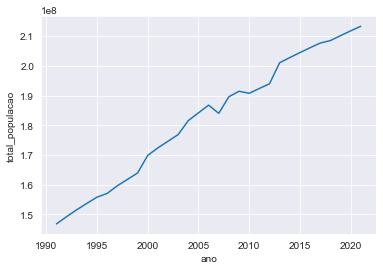

In [13]:
# Consulta que traz a evolução de população no Brasil
query = '''
SELECT p.ano,
       SUM(p.populacao) AS total_populacao
  FROM populacao AS p
 GROUP BY p.ano
'''
df = pd.read_sql(query, conn)

# Cria gráfico de linha a partir dos dados obtidos na consulta
sns.lineplot(data=df, x='ano', y='total_populacao')
plt.show()

Apesar da facilidade de criar um gráfico só com uma linha de código, muito ainda pode ser feito na formatação para aumentar a qualidade da visualização. O código abaixo replica a mesma visualização da célula anterior, mas com melhor formatação usando boas práticas de visualização de dados.

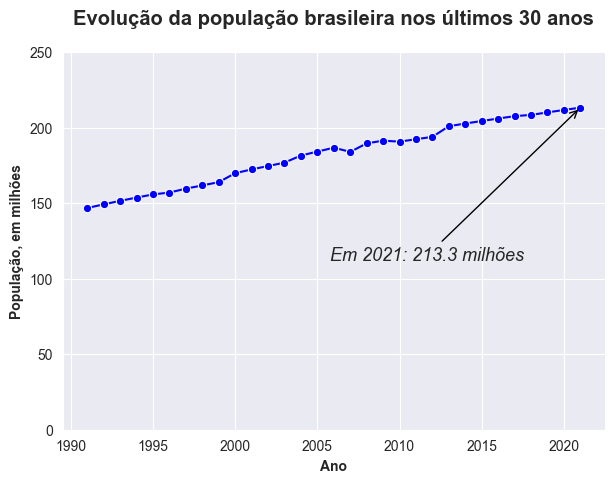

In [14]:
# Consulta que traz a evolução de população no Brasil
query = '''
SELECT p.ano,
       SUM(p.populacao) AS total_populacao
  FROM populacao AS p
 GROUP BY p.ano
'''
df = pd.read_sql(query, conn)

# Cria nova figura e eixos
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

# Adiciona gráfico ao sistema de eixos criado
sns.lineplot(
    data=df, 
    x='ano', y='total_populacao',
    ax=ax, marker='o',
    color='blue'
)

# Altera limites do eixo vertical
ax.set_ylim([0, 250e6])

# Adiciona detalhe ao último valor
ax.annotate(
    text=f'Em 2021: {round(df.total_populacao.iat[-1]/1e6,1)} milhões',
    xy=(df.ano.iat[-1], df.total_populacao.iat[-1]),
    xycoords='data',
    xytext=(-180, -110),
    textcoords='offset points',
    fontsize=13,
    style='italic',
    arrowprops=dict(arrowstyle='->', color='black')
)

# Altera escala do eixo vertical para milhões
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

# Remove bordas do gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Altera título dos eixos
ax.set_ylabel('População, em milhões', fontweight='bold')
ax.set_xlabel('Ano', fontweight='bold')

# Adiciona título ao gráfico
ax.set_title(
    'Evolução da população brasileira nos últimos 30 anos',
    fontsize=14.5,
    pad=20,
    fontweight='bold'
)

# Exibe gráfico no notebook
plt.show()

### 4.1. Qual estado teve a maior taxa de crescimento no período?

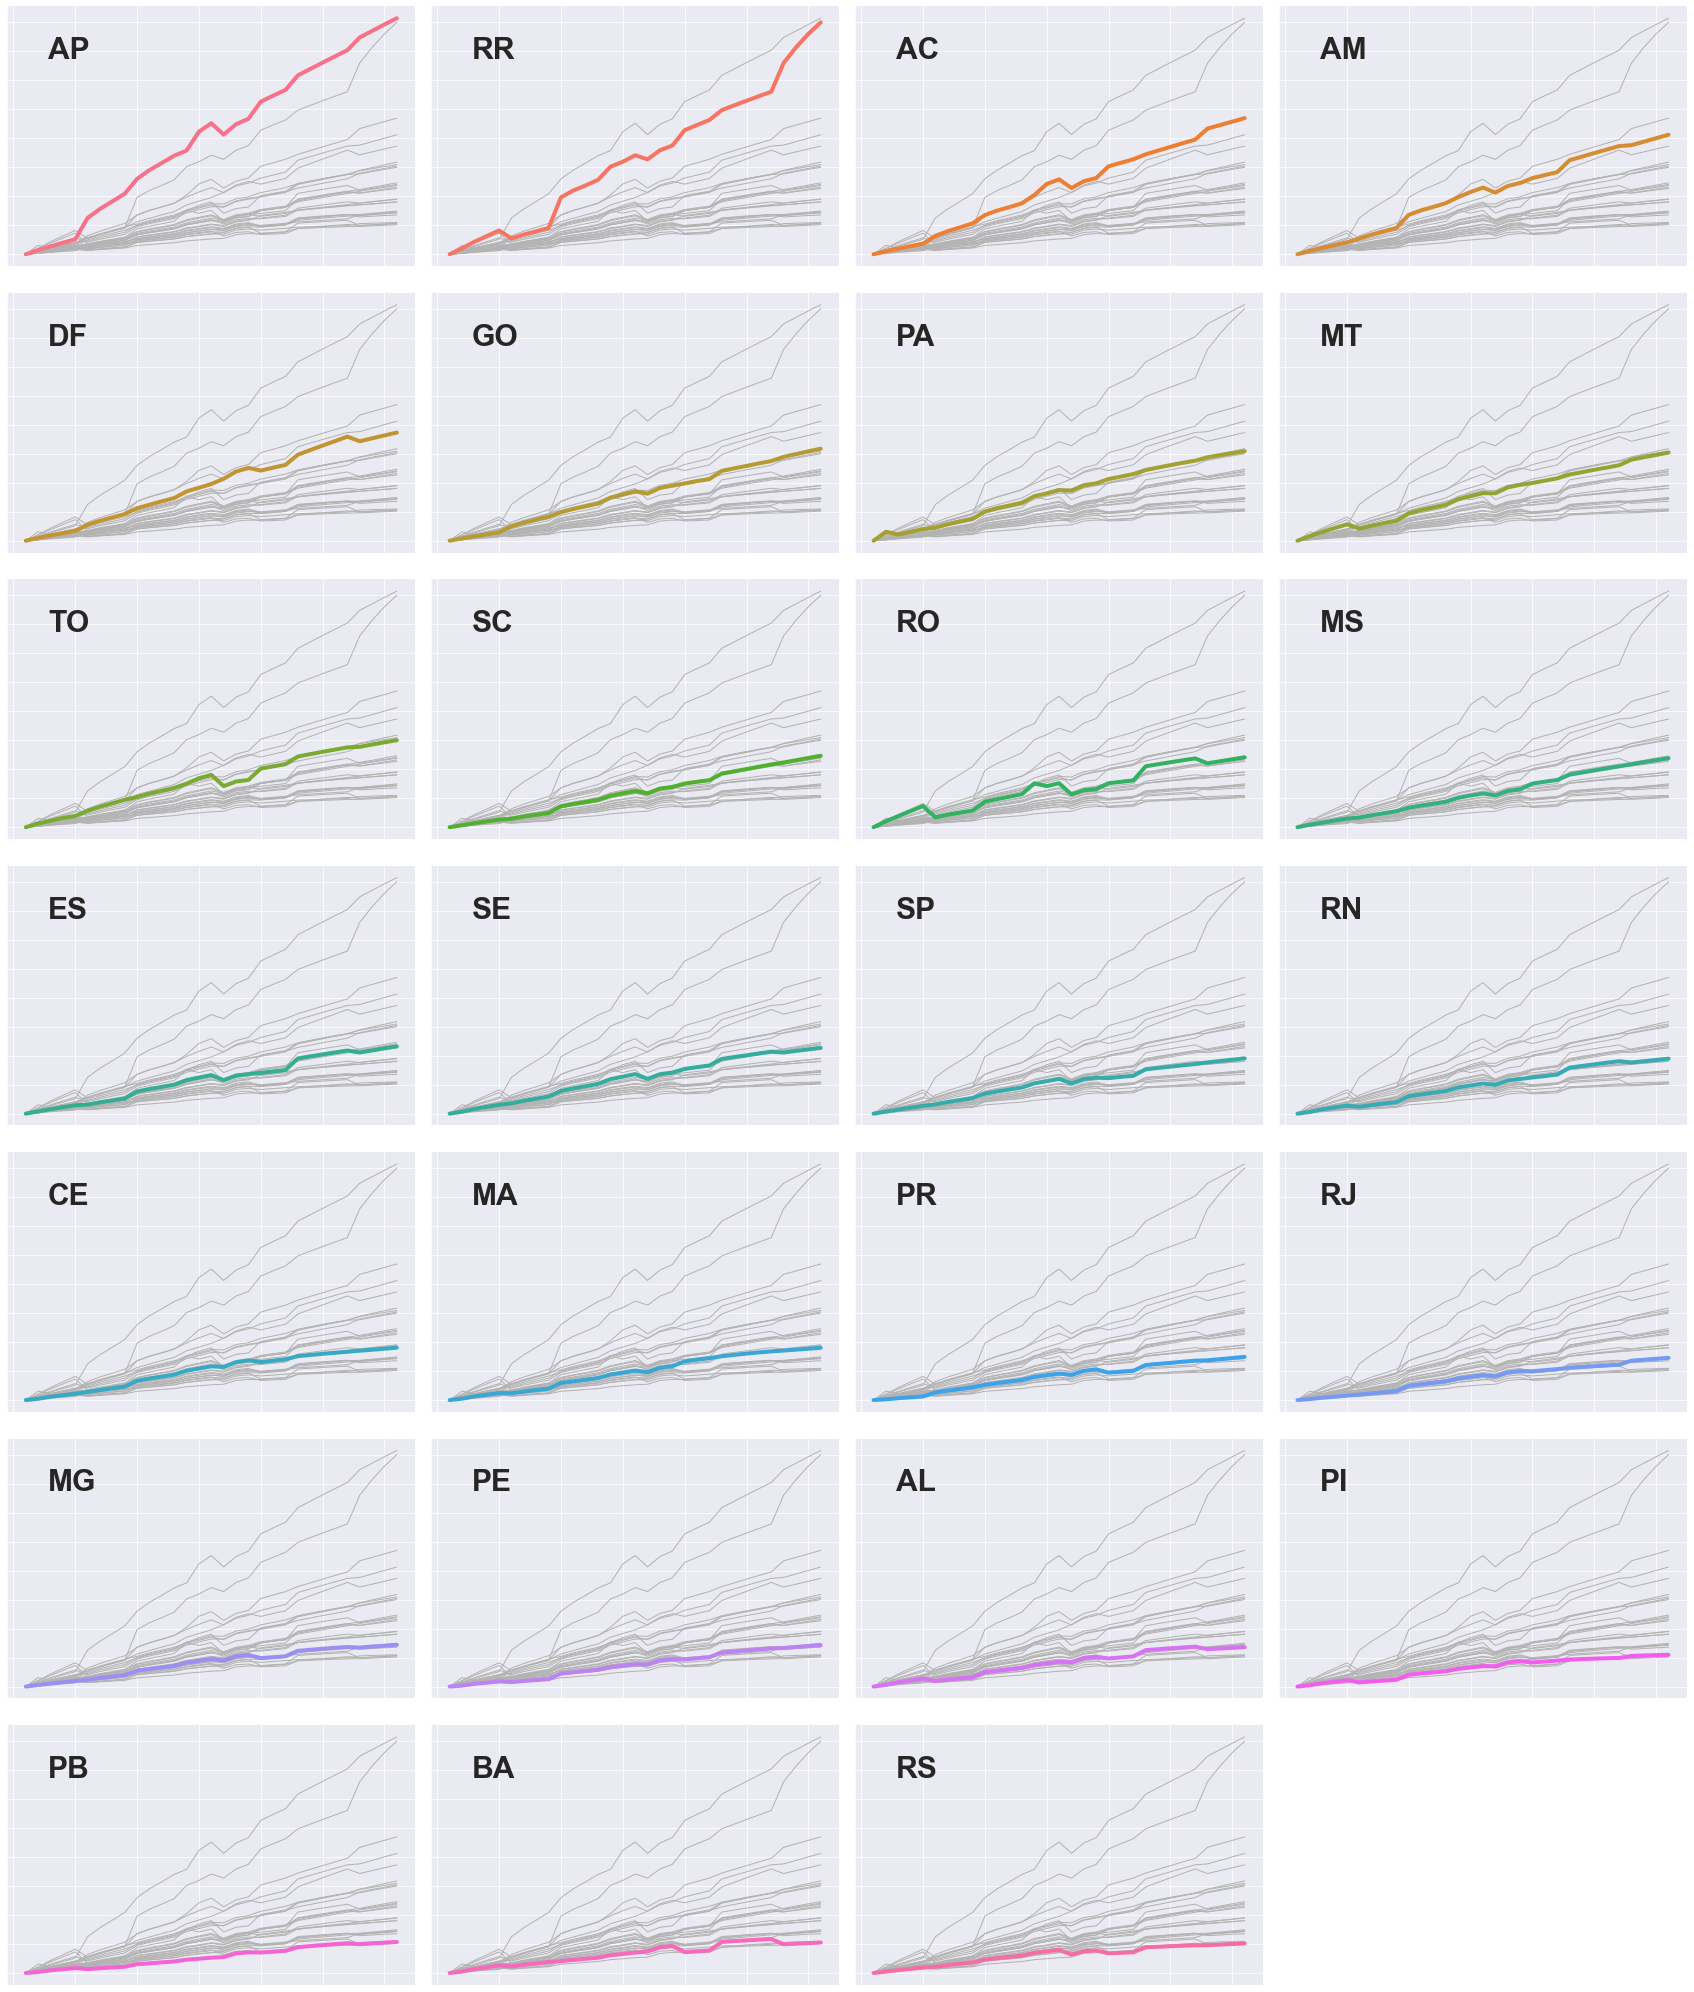

In [15]:
# Consulta que traz a taxa de crescimento para cada ano e estado
query = '''
WITH 
pop_ano_estado AS (
SELECT m.sigla_uf,
       p.ano,
       SUM(p.populacao) AS total_populacao
  FROM municipios AS m
       INNER JOIN populacao AS p
       ON p.id_municipio = m.id_municipio
 GROUP BY m.sigla_uf, p.ano
)

SELECT sigla_uf,
       ano,
       ROUND(total_populacao/FIRST_VALUE(total_populacao) OVER (PARTITION BY sigla_uf ORDER BY ano), 3) AS perc_crescimento
  FROM pop_ano_estado
'''
df = pd.read_sql(query, conn)

# Ordena estados que mais cresceram 
uf_order = df.loc[df.ano==2021, :].sort_values(by='perc_crescimento', ascending=False).sigla_uf

# Cria gráfico com todos os estados
g = sns.relplot(
    data=df, 
    x='ano', y='perc_crescimento', 
    hue='sigla_uf', col='sigla_uf',
    col_order=uf_order, hue_order=uf_order, palette='husl',
    kind='line', linewidth=4, zorder=5,
    col_wrap=4, height=4, aspect=1.5, legend=False, 
)

# Adiciona curvas dos outros estados
for uf, ax in g.axes_dict.items():
    ax.text(.1, .8, uf, transform=ax.transAxes, fontweight='bold', fontsize=30)
    sns.lineplot(
      data=df, x='ano', y='perc_crescimento', units='sigla_uf',
      estimator=None, color='.7', linewidth=1, ax=ax
    )

# Remove títulos e eixos
g.set_titles('')
g.set_axis_labels('', '')
g.tight_layout()
g.set(xticklabels=[])
g.set(yticklabels=[])

# Exibe gráfico no notebook
plt.show()